# **SUBMUESTREO Y PREPROCESAMIENTO**

### Se hizo el submuestreo tomando el 14% de los datos de nuestro dataset para poder utilizarlo desde github y posteriormente se limpiaron, se modificaron y transformaron los datos.

In [ ]:
#SUBMUESTREO
'''
import pandas as pd

file_path = '/content/Retail_Transactions_Dataset.csv'

df = pd.read_csv(file_path)

# Submuestrear 14% de los datos originales)
df_sample = df.sample(frac=0.14, random_state=42)

# Guardar archivo
sample_file_path = '/content/retail_submuestreado7.csv'
df_sample.to_csv(sample_file_path, index=False)
'''

In [ ]:
# PREPROCESAMIENTO
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

file_url = 'https://raw.githubusercontent.com/AbrilPaes/Segmentacion-de-clientes-de-tiendas-minoristas/main/retail_submuestreado.csv'
df = pd.read_csv(file_url)

# Limpieza de datos
df = df.drop_duplicates()
df = df.dropna()

# Modificar los datos
df['Total_Items'] = df['Total_Items'].astype(int)
df['Total_Cost'] = df['Total_Cost'].astype(float)

# Seleccionar la mitad de registros aleatorios
df_sample = df.sample(n=40000, random_state=42)

# Transformación de datos usando get_dummies
df_encoded = pd.get_dummies(df_sample,
                            columns=['Payment_Method',
                                     'City',
                                     'Store_Type',
                                     'Customer_Category', 'Season',
                                     'Promotion'])
df_encoded


<ipython-input-4-dca3a0b6162c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Items'] = df['Total_Items'].astype(int)
<ipython-input-4-dca3a0b6162c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Cost'] = df['Total_Cost'].astype(float)


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,Payment_Method_Cash,Payment_Method_Credit Card,Payment_Method_Debit Card,...,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Promotion_BOGO (Buy One Get One),Promotion_Discount on Selected Items
91168,1000680026,2021-12-02 18:50:21,Brenda Gomez,"['Extension Cords', 'Cleaning Spray', 'Potatoe...",8,87.42,True,False,True,False,...,False,False,False,False,False,False,False,True,True,False
44655,1000409248,2020-09-17 18:22:01,Jamie Waters,"['Shampoo', 'Pasta', 'Insect Repellent']",4,17.13,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
66842,1000956353,2023-07-30 15:54:22,Shannon Smith,['Toothbrush'],8,45.66,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
65681,1000586705,2021-01-09 05:58:08,Meagan Blackburn,['Deodorant'],1,55.03,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
44195,1000523632,2020-07-27 08:14:53,Steven Thomas DDS,['Potatoes'],8,20.04,True,True,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16543,1000600394,2020-04-12 10:09:58,Cynthia Powers,"['Razors', 'Canned Soup', 'Diapers']",8,92.09,True,True,False,False,...,False,False,False,False,False,False,False,True,True,False
20229,1000115875,2023-06-22 08:50:56,Micheal Miller,['Shower Gel'],4,75.97,False,False,False,True,...,False,False,False,True,False,False,False,True,False,True
52974,1000571149,2020-07-31 11:00:28,Beth Bowen,"['Cereal', 'Power Strips', 'Shower Gel']",8,30.24,False,False,False,True,...,False,False,False,True,False,False,False,True,True,False
69580,1000878347,2024-01-14 17:21:21,Kevin Rojas,"['Bath Towels', 'Orange', 'Coffee']",3,24.71,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True


# **CLUSTERING**

### Se hizo la selección de columnas especificas para poder realizar el clustering.


---


### Primero se hizo el calculo de distancias KNN de los vecinos más cercanos para poder obtener el valor de la varibale epsilon y realizar el clustering.



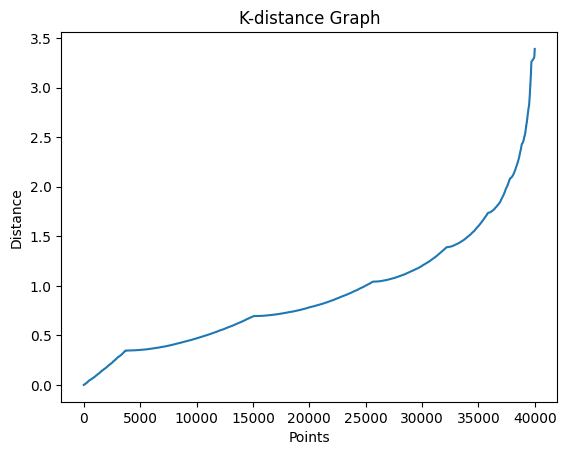

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Campos especificados
fields = ['Payment_Method_Cash', 'Total_Cost','Total_Items',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_Mobile Payment', 'City_Atlanta', 'City_Boston',
       'City_Chicago', 'City_Dallas', 'City_Houston', 'City_Los Angeles',
       'City_Miami', 'City_New York', 'City_San Francisco', 'City_Seattle',
       'Store_Type_Convenience Store', 'Store_Type_Department Store',
       'Store_Type_Pharmacy', 'Store_Type_Specialty Store',
       'Store_Type_Supermarket', 'Store_Type_Warehouse Club',
       'Customer_Category_Homemaker', 'Customer_Category_Middle-Aged',
       'Customer_Category_Professional', 'Customer_Category_Retiree',
       'Customer_Category_Senior Citizen', 'Customer_Category_Student',
       'Customer_Category_Teenager', 'Customer_Category_Young Adult',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']

df_subset = df_encoded[fields]

# Normalización
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_subset)
df_normalized = pd.DataFrame(df_normalized, columns=fields)

# Distancias KNN
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_normalized)
distances, indices = neighbors_fit.kneighbors(df_normalized)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-distance')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# **EVALUACIÓN**

### Se hace el clustering con DBSCAN donde se requiere 3 puntos para poder realizar los grupos. Después se evalua la agrupación con ayuda de silhouette score. Después se muestra los puntos de ruido y cantidad de clusters realizados.

In [ ]:
import seaborn as sns

# DBSCAN
eps_value = 3.12
db = DBSCAN(eps=eps_value, min_samples=3).fit(df_normalized)
labels = db.labels_

# Etiqueta al DataFrame
df_normalized['Cluster'] = labels

# Evaluación
sil_score = silhouette_score(df_normalized, labels)
print(f'Silhouette Score: {sil_score}')



Silhouette Score: 0.7196155733993431


In [ ]:
# Puntos no asignados
noise_mask = (labels == -1)
df_noise = df_normalized[noise_mask]
df_clusters = df_normalized[~noise_mask]

print(f'Número de puntos de ruido: {len(df_noise)}')
print('Datos de ruido:')
print(df_noise.head())

Número de puntos de ruido: 1445
Datos de ruido:
    Payment_Method_Cash  Total_Cost  Total_Items  Payment_Method_Credit Card  \
38            -0.577466   -0.006035    -0.862120                   -0.583778   
41            -0.577466    1.348694    -1.557001                   -0.583778   
71             1.731704    1.352710     1.222520                   -0.583778   
87            -0.577466    1.036851    -1.209560                   -0.583778   
91             1.731704    0.928034     1.222520                   -0.583778   

    Payment_Method_Debit Card  Payment_Method_Mobile Payment  City_Atlanta  \
38                  -0.573386                       1.739822     -0.330967   
41                  -0.573386                       1.739822     -0.330967   
71                  -0.573386                      -0.574771     -0.330967   
87                   1.744027                      -0.574771     -0.330967   
91                  -0.573386                      -0.574771     -0.330967   

  

In [ ]:
# Clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Número de clusters encontrados: {num_clusters}')


Número de clusters encontrados: 6836


In [ ]:
df_encoded['Cluster'] = labels
df_subset['Cluster'] = labels

<ipython-input-19-702ff650cc03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = labels


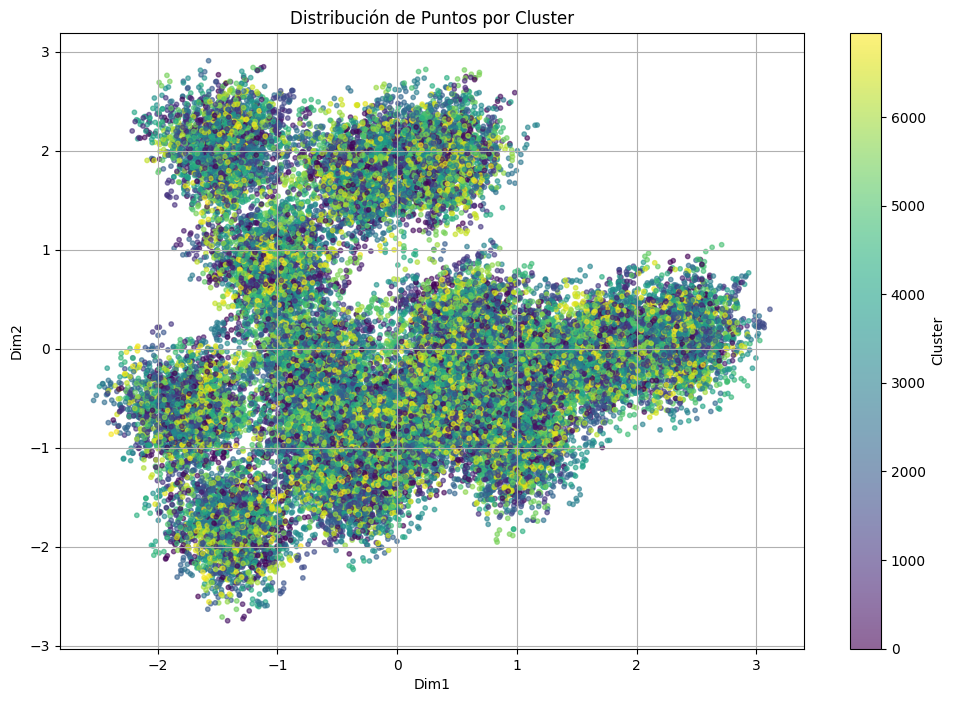

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X = df_subset.drop(['Cluster'], axis=1)
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad
pca = PCA(n_components=2)
df_2d = pca.fit_transform(X_scaled)

# DataFrame con las dos dimensiones y las etiquetas de los clusters
df_2d = pd.DataFrame(df_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = df_subset['Cluster'].values


plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_2d['Dim1'], df_2d['Dim2'], c=df_2d['Cluster'], cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('Distribución de Puntos por Cluster')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.grid(True)
plt.show()

In [ ]:
# Filtrar los campos

relevant_fields = [
    'Payment_Method_Cash', 'Payment_Method_Credit Card', 'Payment_Method_Debit Card', 'Payment_Method_Mobile Payment',
    'City_Atlanta', 'City_Boston', 'City_Chicago', 'City_Dallas', 'City_Houston', 'City_Los Angeles',
    'City_Miami', 'City_New York', 'City_San Francisco', 'City_Seattle',
    'Store_Type_Convenience Store', 'Store_Type_Department Store', 'Store_Type_Pharmacy',
    'Store_Type_Specialty Store', 'Store_Type_Supermarket', 'Store_Type_Warehouse Club',
    'Customer_Category_Homemaker', 'Customer_Category_Middle-Aged', 'Customer_Category_Professional',
    'Customer_Category_Retiree', 'Customer_Category_Senior Citizen', 'Customer_Category_Student',
    'Customer_Category_Teenager', 'Customer_Category_Young Adult', 'Season_Fall', 'Season_Spring',
    'Season_Summer', 'Season_Winter'
]

# Agrupar por cluster
true_counts_per_cluster = {}
for cluster, group in df_encoded.groupby('Cluster'):
    true_counts = {field: group[field].sum() for field in relevant_fields}
    true_counts_per_cluster[cluster] = true_counts

# Campo  más frecuente
most_frequent_true = {}
for field in relevant_fields:
    total_true_count = sum(true_counts[field] for true_counts in true_counts_per_cluster.values())
    most_frequent_true[field] = total_true_count

most_frequent_true_df = pd.DataFrame(list(most_frequent_true.items()), columns=['Field', 'True Count'])

# Ordenar descendente
most_frequent_true_df = most_frequent_true_df.sort_values(by='True Count', ascending=False)
print(most_frequent_true_df)

                               Field  True Count
1         Payment_Method_Credit Card       10167
28                       Season_Fall       10079
30                     Season_Summer       10054
0                Payment_Method_Cash       10003
29                     Season_Spring        9934
31                     Season_Winter        9933
3      Payment_Method_Mobile Payment        9933
2          Payment_Method_Debit Card        9897
19         Store_Type_Warehouse Club        6792
18            Store_Type_Supermarket        6771
16               Store_Type_Pharmacy        6721
15       Store_Type_Department Store        6635
14      Store_Type_Convenience Store        6558
17        Store_Type_Specialty Store        6523
22    Customer_Category_Professional        5134
24  Customer_Category_Senior Citizen        5070
25         Customer_Category_Student        5042
20       Customer_Category_Homemaker        5005
23         Customer_Category_Retiree        4972
26        Customer_C

# **Gráfica**

### Se muestra la comparación entre los clusters obtenidos y los puntos de ruido, donde podemos observar como es que se encuentran posicionados.

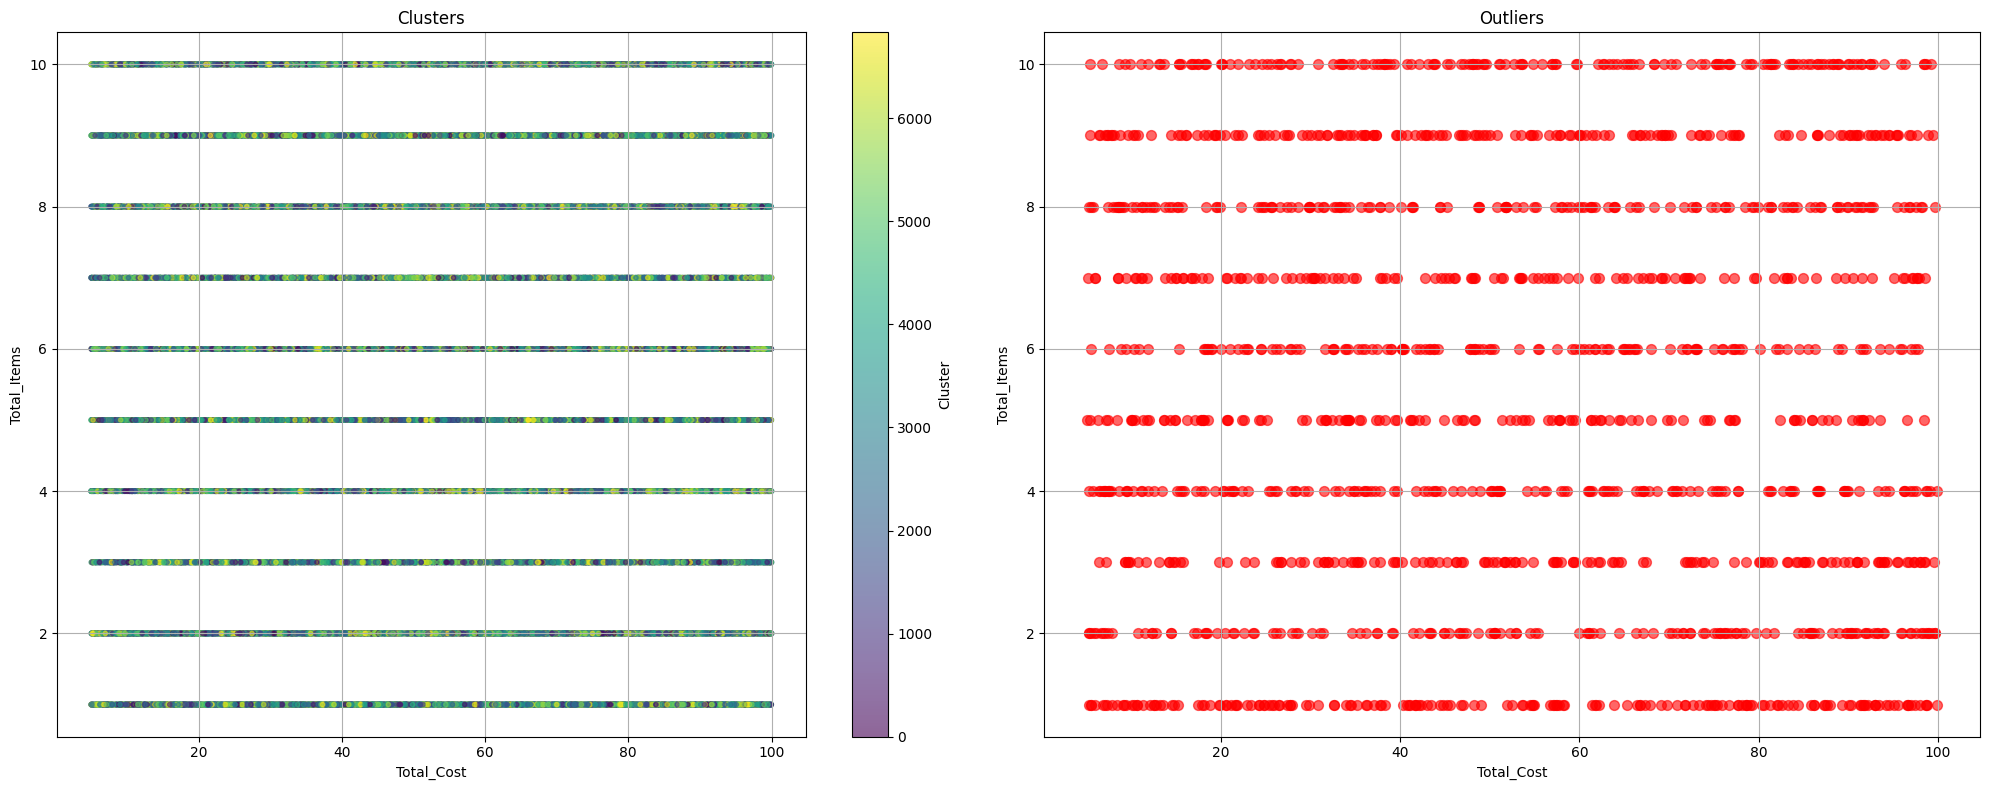

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos de outliers
outliers = df_subset[df_subset['Cluster'] == -1]

# Filtrar datos de clusters
clusters = df_subset[df_subset['Cluster'] != -1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

scatter_clusters = ax1.scatter(
    clusters['Total_Cost'], clusters['Total_Items'],
    c=clusters['Cluster'], cmap='viridis', alpha=0.6, s=10
)
ax1.set_title('Clusters')
ax1.set_xlabel('Total_Cost')
ax1.set_ylabel('Total_Items')
ax1.grid(True)

cbar = plt.colorbar(scatter_clusters, ax=ax1, label='Cluster')

ax2.scatter(
    outliers['Total_Cost'], outliers['Total_Items'],
    color='red', alpha=0.6, s=50, label='Outliers'
)
ax2.set_title('Outliers')
ax2.set_xlabel('Total_Cost')
ax2.set_ylabel('Total_Items')
ax2.grid(True)

plt.tight_layout()
plt.show()

### **Se muestra un mapa de calor donde podemos observar las características que contiene cada cluster, para "Total_Cost" y "Total_Items"	se muestra el promedio y para los demás campos donde se encuentre un 1 significa que esa característica se tomo en cuenta para agrupar el cluster, de lo contrario se coloca como 0.**

In [ ]:
import pandas as pd


# Excluir el clúster -1
df_filtered = df_subset[df_subset['Cluster'] != -1]

# Contar el número de registros
cluster_sizes = df_filtered['Cluster'].value_counts()

# Incluir 30 clústeres
top_30_clusters = cluster_sizes.head(30).index
df_top_30 = df_filtered[df_filtered['Cluster'].isin(top_30_clusters)]


df_top_30

,Payment_Method_Cash,Total_Cost,Total_Items,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Mobile Payment,City_Atlanta,City_Boston,City_Chicago,City_Dallas,...,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Cluster
107268,True,69.36,2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,40
61192,False,51.36,4,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,43
120622,False,90.75,3,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,85
9049,False,37.34,6,True,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,205
13913,True,93.40,10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97054,True,47.46,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,404
100539,False,92.07,10,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,4283
2121,False,9.55,3,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,621
79459,False,64.54,9,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,4114


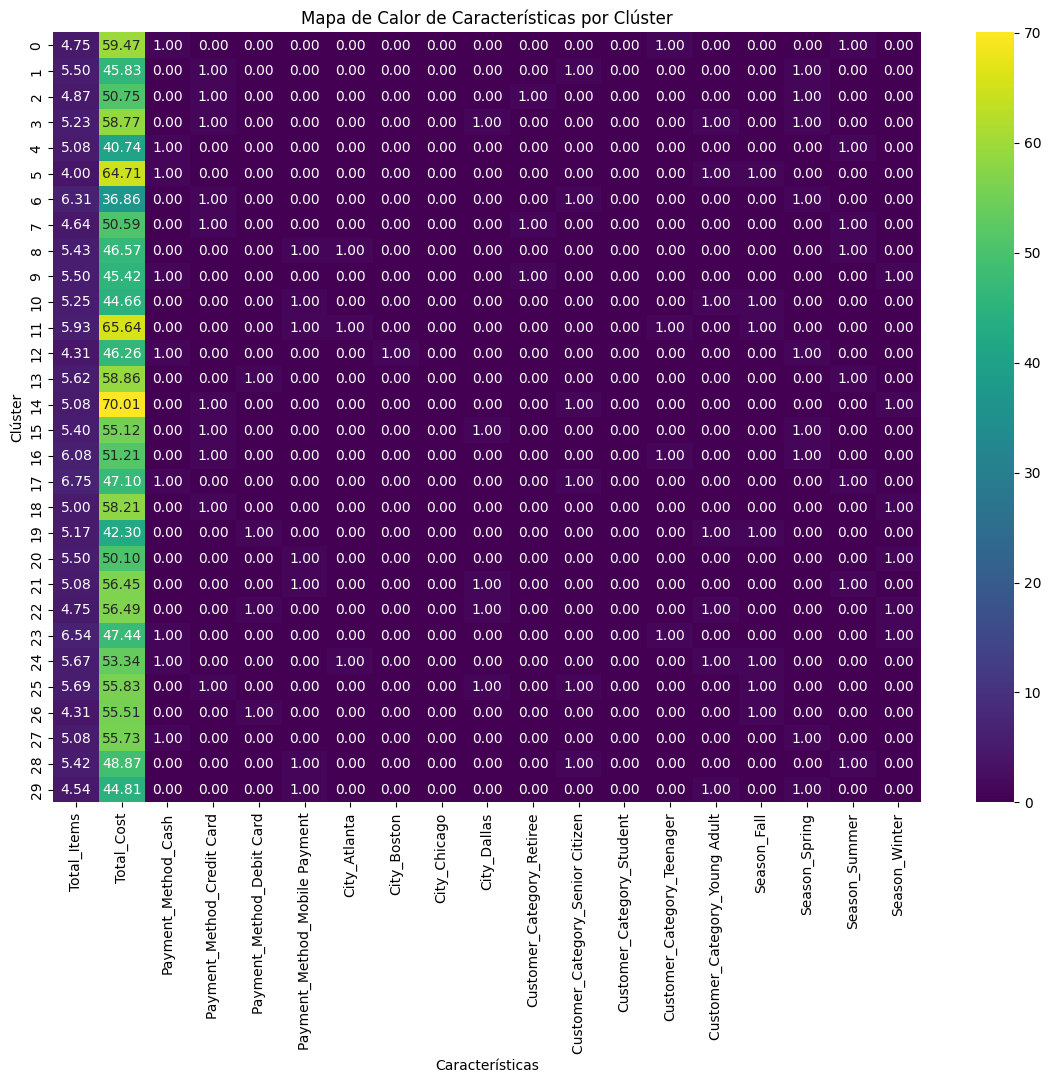

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir el clúster -1
df_filtered = df_subset[df_subset['Cluster'] != -1]

# Contar el número de registros en cada clúster
cluster_sizes = df_filtered['Cluster'].value_counts()

# Seleccionar  30 clústeres
top_30_clusters = cluster_sizes.head(30).index

#Incluir solo estos 30 clústeres
df_top_30 = df_filtered[df_filtered['Cluster'].isin(top_30_clusters)]

# Reorganizar los datos
heatmap_data = df_top_30.groupby('Cluster').mean().reset_index()

# Seleccionar las columnas
columns_of_interest = [
    'Total_Items', 'Total_Cost',
    'Payment_Method_Cash', 'Payment_Method_Credit Card',
    'Payment_Method_Debit Card', 'Payment_Method_Mobile Payment',
    'City_Atlanta', 'City_Boston', 'City_Chicago', 'City_Dallas',
    'Customer_Category_Retiree', 'Customer_Category_Senior Citizen',
    'Customer_Category_Student', 'Customer_Category_Teenager', 'Customer_Category_Young Adult',
    'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'
]


missing_columns = [col for col in columns_of_interest if col not in heatmap_data.columns]
if missing_columns:
    print(f"Advertencia: Las siguientes columnas no están en los datos: {missing_columns}")

# Filtrar los datos
heatmap_data = heatmap_data[columns_of_interest]


plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f')
plt.title('Mapa de Calor de Características por Clúster')
plt.xlabel('Características')
plt.ylabel('Clúster')
plt.show()

# **ANÁLISIS**

### Se  realizan diferentes gráficas sobre los clusters obtenidos, donde podemos observar cuáles son los valores principales de cada campo.

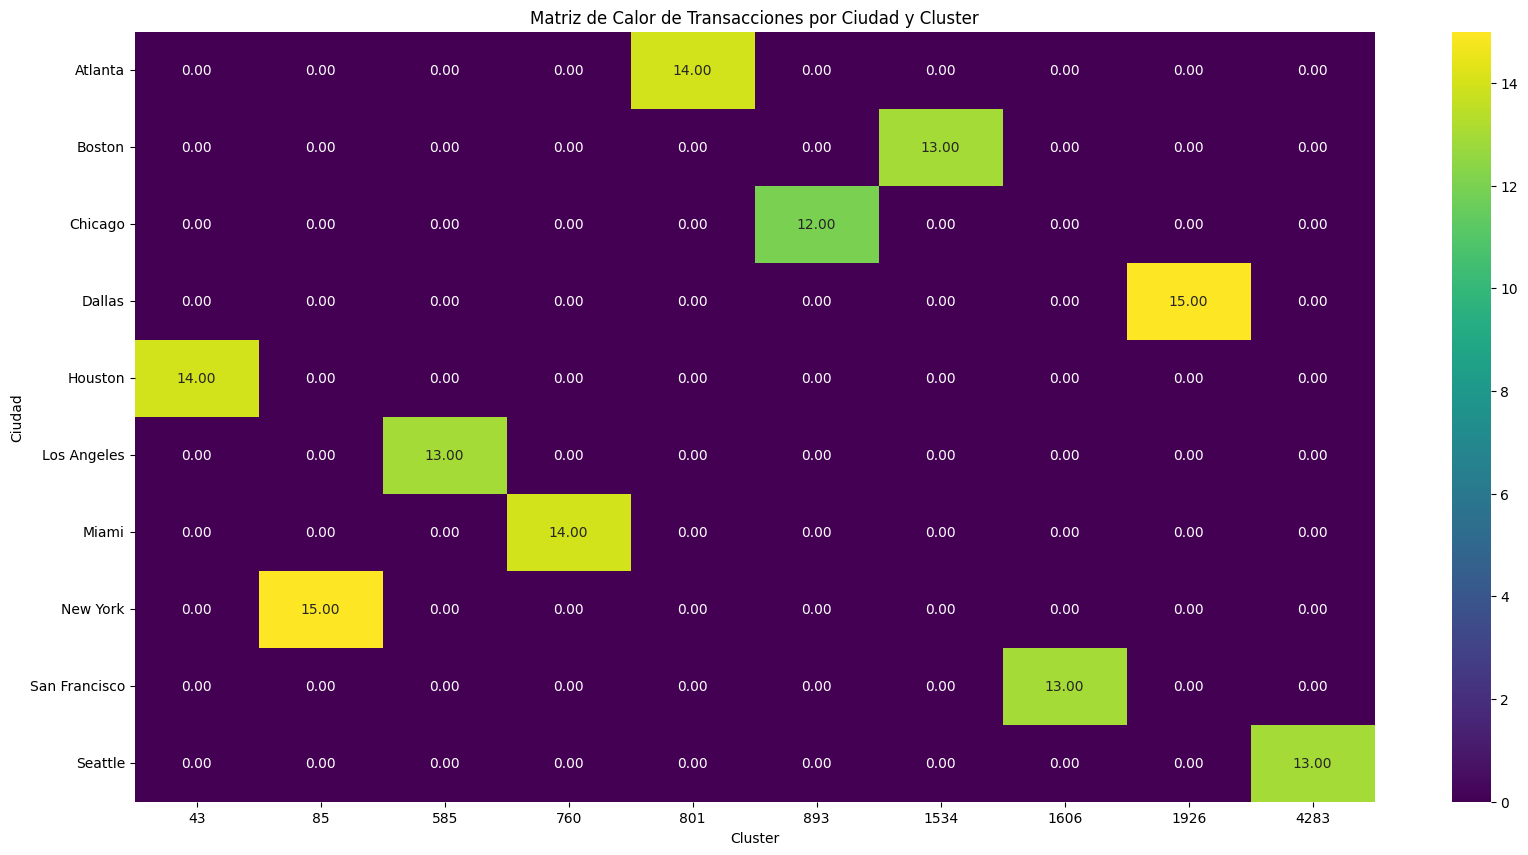

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_encoded['City'] = df_encoded.filter(like='City_').idxmax(axis=1).str.replace('City_', '')

total_transactions = df_encoded.groupby(['City', 'Cluster']).size().reset_index(name='Total_Transactions')

filtered_data = total_transactions[total_transactions['Cluster'] != -1]

top_clusters_per_city = filtered_data.loc[filtered_data.groupby('City')['Total_Transactions'].idxmax()]

# 30 clusters
top_clusters = top_clusters_per_city['Cluster'].unique()[:30]

filtered_data = filtered_data[filtered_data['Cluster'].isin(top_clusters)]

heatmap_data = filtered_data.pivot_table(index='City', columns='Cluster', values='Total_Transactions', fill_value=0)

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f')
plt.title('Matriz de Calor de Transacciones por Ciudad y Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ciudad')
plt.show()

## **Gráfica donde se muestra el tipo de pago por ciudad**

<ipython-input-98-7bfbefcec432>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=filtered_data, x='City', y='Total_Products_Sold', hue='Payment_Method', palette='tab10', ci=None)


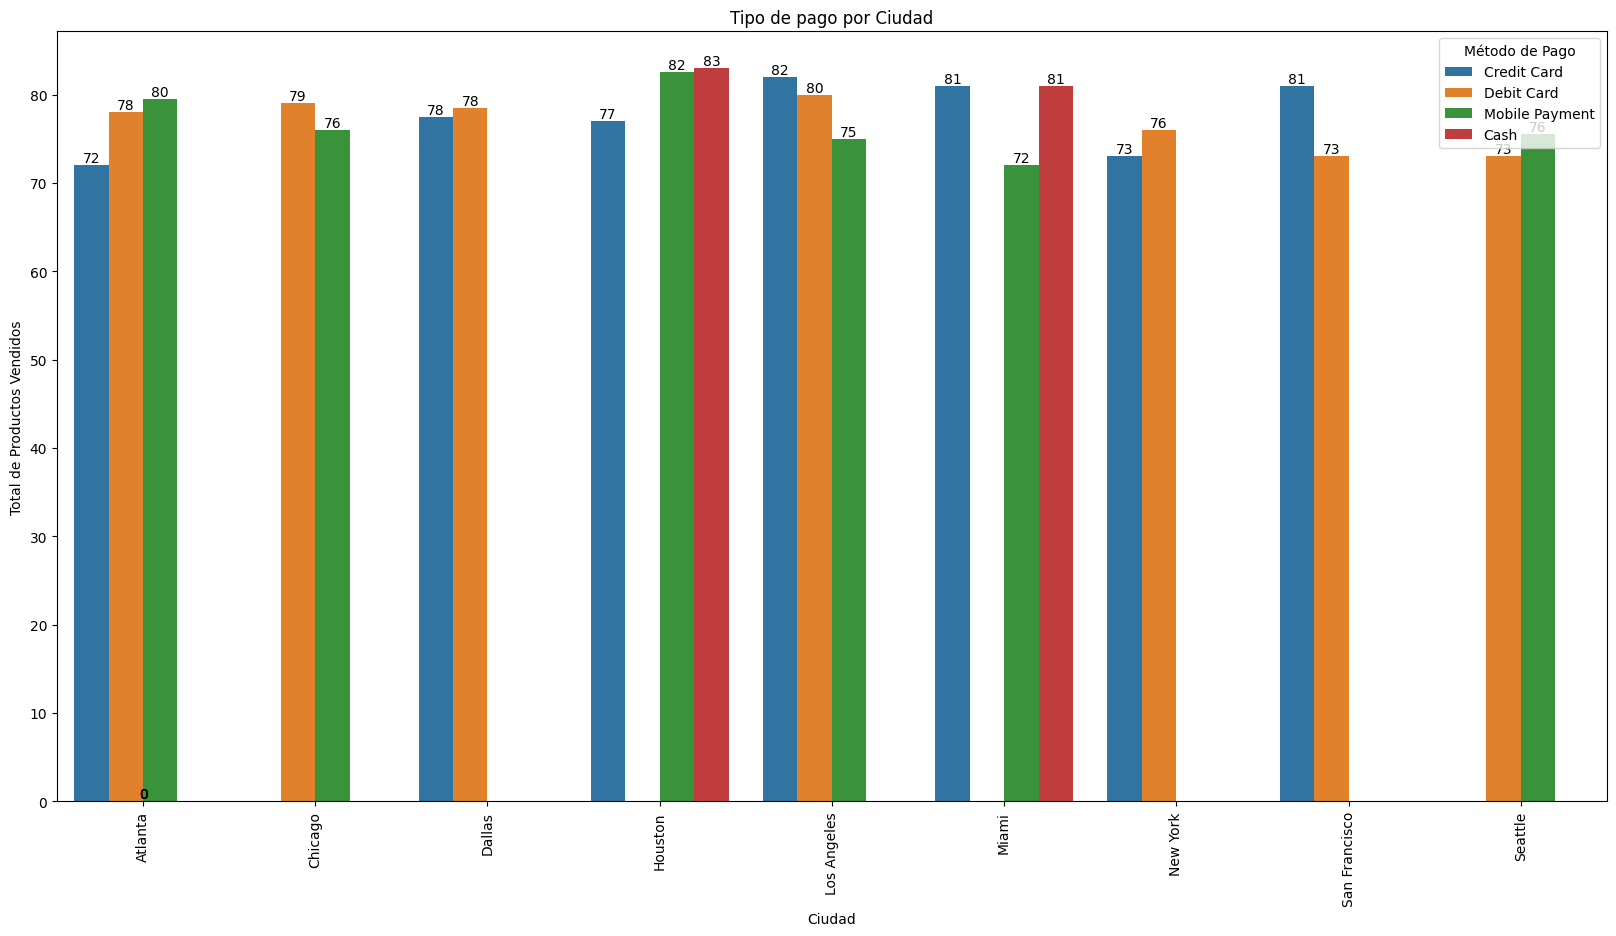

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_encoded['City'] = df_encoded.filter(like='City_').idxmax(axis=1).str.replace('City_', '')
df_encoded['Payment_Method'] = df_encoded.filter(like='Payment_Method_').idxmax(axis=1).str.replace('Payment_Method_', '')

total_products_sold = df_encoded.groupby(['City', 'Payment_Method', 'Cluster'])['Total_Items'].sum().reset_index(name='Total_Products_Sold')

filtered_data = total_products_sold[total_products_sold['Cluster'] != -1]

# Incluir los 30 clusters
top_clusters = filtered_data.groupby('Cluster')['Total_Products_Sold'].sum().nlargest(30).index

filtered_data = filtered_data[filtered_data['Cluster'].isin(top_clusters)]

plt.figure(figsize=(20, 10))
barplot = sns.barplot(data=filtered_data, x='City', y='Total_Products_Sold', hue='Payment_Method', palette='tab10', ci=None)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.title('Tipo de pago por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Total de Productos Vendidos')
plt.xticks(rotation=90)
plt.legend(title='Método de Pago')
plt.show()

## **Gráfica donde muestra las compras realizadas por tipo de cliente**

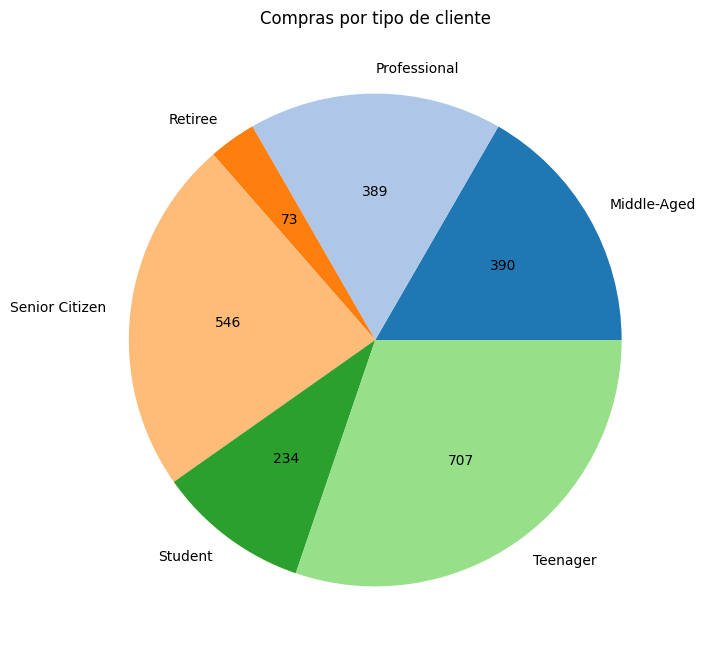

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customer_categories = df_encoded.filter(like='Customer_Category_').idxmax(axis=1)
customer_categories = customer_categories.str.replace('Customer_Category_', '')

df_encoded['Customer_Category'] = customer_categories

total_products_sold = df_encoded.groupby(['Customer_Category', 'Cluster'])['Total_Items'].sum().reset_index(name='Total_Products_Sold')

filtered_data = total_products_sold[total_products_sold['Cluster'] != -1]

# Incluir solo 30 clusters
top_clusters = filtered_data.groupby('Cluster')['Total_Products_Sold'].sum().nlargest(30).index

filtered_data = filtered_data[filtered_data['Cluster'].isin(top_clusters)]


total_by_customer_category = filtered_data.groupby('Customer_Category')['Total_Products_Sold'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.pie(total_by_customer_category['Total_Products_Sold'],
        labels=total_by_customer_category['Customer_Category'],
        autopct=lambda p: '{:.0f}'.format(p * total_by_customer_category['Total_Products_Sold'].sum() / 100),
        colors=sns.color_palette('tab20', n_colors=len(total_by_customer_category)))
plt.title('Compras por tipo de cliente')
plt.show()

## **Gráfica donde muestra los productos vendidos por temporada**

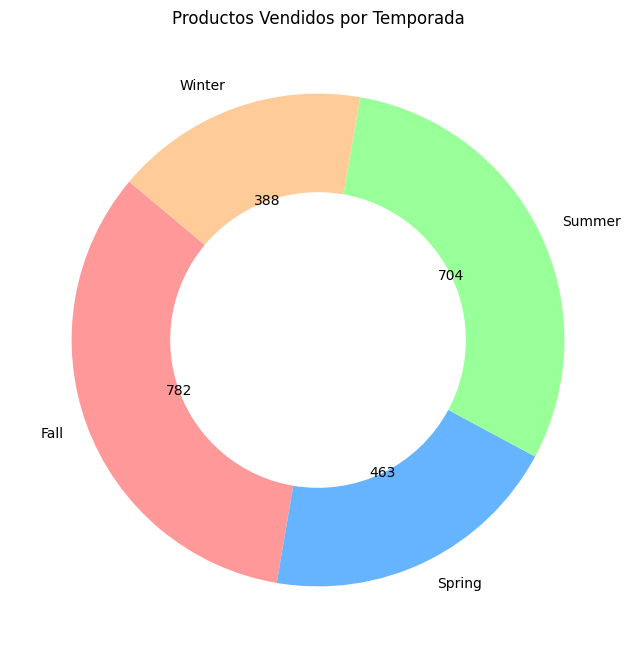

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


season_columns = ['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']
df_encoded['Season'] = df_encoded[season_columns].idxmax(axis=1).str.replace('Season_', '')

total_products_sold = df_encoded.groupby(['Season', 'Cluster'])['Total_Items'].sum().reset_index(name='Total_Products_Sold')

filtered_data = total_products_sold[total_products_sold['Cluster'] != -1]

# Incluir solo 30 clusters
top_clusters = filtered_data.groupby('Cluster')['Total_Products_Sold'].sum().nlargest(30).index

filtered_data = filtered_data[filtered_data['Cluster'].isin(top_clusters)]

season_cluster_totals = filtered_data.groupby(['Season'])['Total_Products_Sold'].sum()


def func(pct, allvals):
    return f'{int(pct / 100.*sum(allvals))}'
plt.figure(figsize=(10, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(season_cluster_totals, labels=season_cluster_totals.index, autopct=lambda pct: func(pct, season_cluster_totals), startangle=140, colors=colors, wedgeprops=dict(width=0.4))
plt.title('Productos Vendidos por Temporada')
plt.show()

## **Gráfica donde muestra los productos vendidos por tipo de tienda y el método de pago**

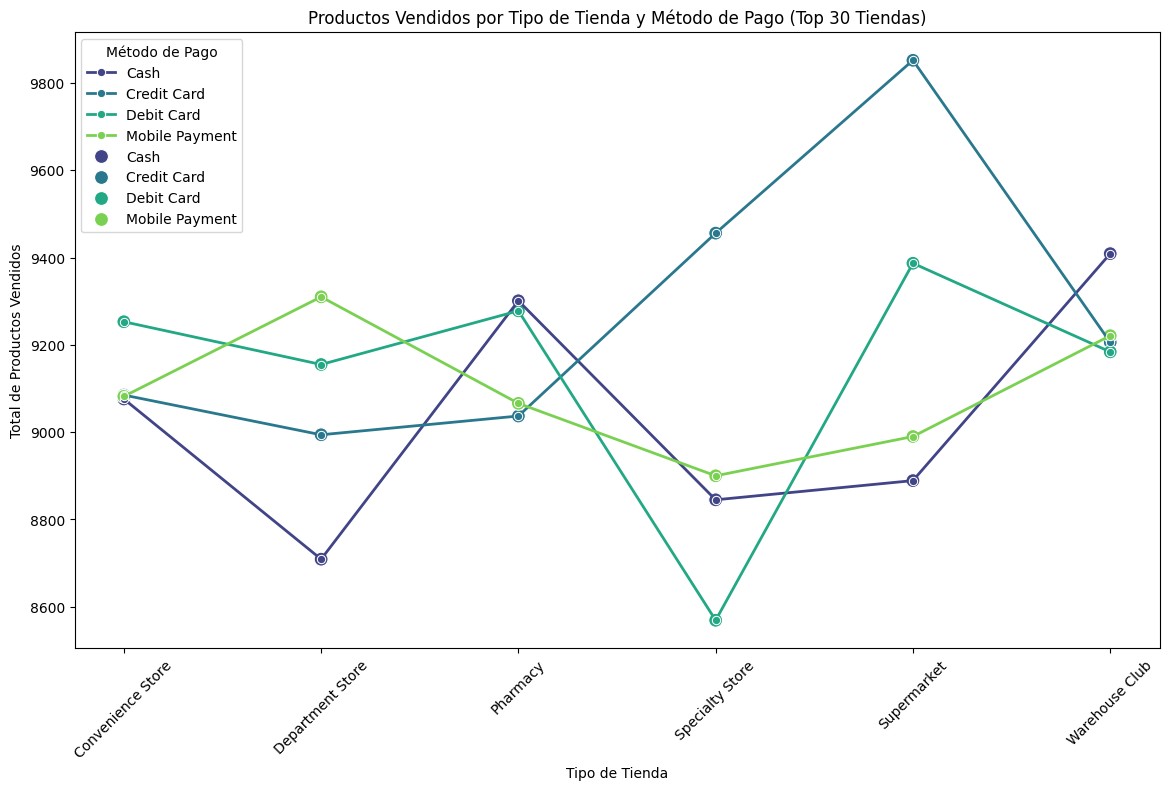

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

store_columns = ['Store_Type_Warehouse Club', 'Store_Type_Supermarket', 'Store_Type_Pharmacy',
                  'Store_Type_Department Store', 'Store_Type_Convenience Store', 'Store_Type_Specialty Store']

df_encoded['Store_Type'] = df_encoded[store_columns].idxmax(axis=1).str.replace('Store_Type_', '')

total_products_sold = df_encoded.groupby(['Store_Type', 'Payment_Method'])['Total_Items'].sum().reset_index(name='Total_Products_Sold')

top_store_types = total_products_sold.groupby('Store_Type')['Total_Products_Sold'].sum().nlargest(30).index

filtered_data = total_products_sold[total_products_sold['Store_Type'].isin(top_store_types)]

plt.figure(figsize=(14, 8))

sns.lineplot(data=filtered_data, x='Store_Type', y='Total_Products_Sold', hue='Payment_Method', palette='viridis', marker='o', linestyle='-', linewidth=2)
sns.scatterplot(data=filtered_data, x='Store_Type', y='Total_Products_Sold', hue='Payment_Method', palette='viridis', s=100, edgecolor='w')

plt.title('Productos Vendidos por Tipo de Tienda y Método de Pago')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Total de Productos Vendidos')
plt.xticks(rotation=45)
plt.legend(title='Método de Pago')
plt.show()

## **Gráfica donde muestra el costo total por categoría de cliente y método de pago**

<ipython-input-94-308e916134d7>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, y='Customer_Category', x='Total_Cost_Spent', hue='Payment_Method', palette='coolwarm', ci=None)


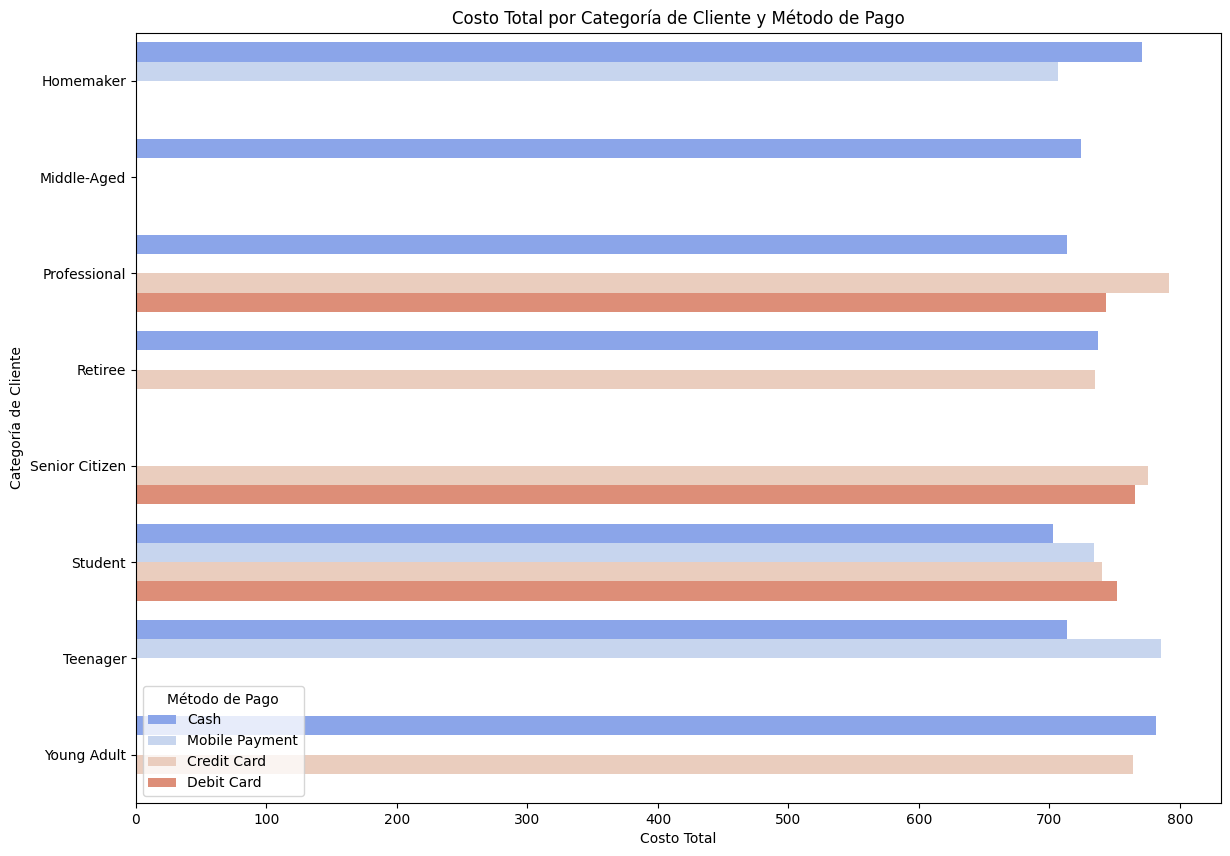

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una columna para identificar la categoría del cliente y el método de pago
df_encoded['Customer_Category'] = df_encoded.filter(like='Customer_Category_').idxmax(axis=1).str.replace('Customer_Category_', '')
df_encoded['Payment_Method'] = df_encoded.filter(like='Payment_Method_').idxmax(axis=1).str.replace('Payment_Method_', '')

# Calcular el costo total por categoría de cliente, método de pago y cluster
total_cost_clusters = df_encoded.groupby(['Customer_Category', 'Payment_Method', 'Cluster'])['Total_Cost'].sum().reset_index(name='Total_Cost_Spent')
filtered_data = total_cost_clusters[total_cost_clusters['Cluster'] != -1]

# Incluir solo los 30
top_clusters = filtered_data.groupby('Cluster')['Total_Cost_Spent'].sum().nlargest(30).index
filtered_data = filtered_data[filtered_data['Cluster'].isin(top_clusters)]


plt.figure(figsize=(14, 10))
sns.barplot(data=filtered_data, y='Customer_Category', x='Total_Cost_Spent', hue='Payment_Method', palette='coolwarm', ci=None)


plt.title('Costo Total por Categoría de Cliente y Método de Pago')
plt.xlabel('Costo Total')
plt.ylabel('Categoría de Cliente')
plt.legend(title='Método de Pago')
plt.show()